In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments = pd.read_csv('D:\My Project\Data Analytics\Projects\Youtube Text Data Analysis/GBcomments.csv', error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [4]:
comments.shape

(718452, 4)

In [5]:
from textblob import TextBlob

In [6]:
TextBlob('awesome').sentiment.polarity

1.0

In [7]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
comments['polarity']=polarity

In [11]:
comments.head(20)

video_id                                       comment_text  likes  \
0   jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1   jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2   jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3   jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4   jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5   jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6   jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7   jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8   jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9   jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   
10  jt2OHQh0HoQ           Mom said: Just one more video before bed      0   
11  jt2OHQh0HoQ                           what is the song?? 39:20      0   
12  jt2OHQh0HoQ  I started crying at 49:01 when Emma's EP showe...      0   
13  jt2OHQh0HoQ  3 years late on wireless charging, 3 years lat...      0   
14  jt2OHQh0HoQ                             more one before to bed      0   
15  jt2OHQh0HoQ                subscribe me if you love your mummy      0   
16  jt2OHQh0HoQ  They really just took the samsung s8 and named...      0   
17  jt2OHQh0HoQ  so if someone has a twin sibling both can unlo...      0   
18  jt2OHQh0HoQ             For god sake its better than my ps4pro      0   
19  jt2OHQh0HoQ     7mp cam what kind of standard is this in 2017?      0   

    replies  polarity  
0         0  0.450000  
1         0  0.000000  
2         0  0.000000  
3         0  0.000000  
4         0  1.000000  
5         0  0.300000  
6         0  0.000000  
7         0 -0.100000  
8         0  0.028571  
9         0  0.500000  
10        0  0.500000  
11        0  0.000000  
12        0  0.300000  
13        0  0.026563  
14        0  0.500000  
15        0  0.500000  
16        0  0.200000  
17        0  0.250000  
18        0  0.500000  
19        0  0.300000

## Word Cloud Representation

### For Positive Words

In [12]:
comments_positive = comments[comments['polarity'] == 1]

In [14]:
comments_positive.shape

(20400, 5)

In [15]:
comments_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [19]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
stopwords = set(STOPWORDS)

In [25]:
len(stopwords)

192

In [26]:
#storing all the comments in single variable by joining from all the rows
total_comments = ''.join(comments_positive['comment_text'])

In [27]:
wordCloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

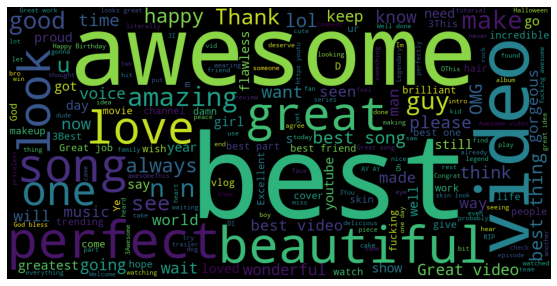

In [29]:
plt.figure(figsize=(15, 5))
plt.imshow(wordCloud)
plt.axis('off')

### For Negative Words

In [30]:
comments_negative = comments[comments['polarity'] == -1]

In [31]:
#storing all the comments in single variable by joining from all the rows
total_comments = ''.join(comments_negative['comment_text'])

In [32]:
wordCloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

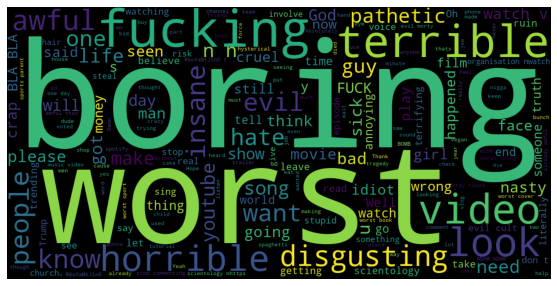

In [33]:
plt.figure(figsize=(15, 5))
plt.imshow(wordCloud)
plt.axis('off')

### Analysing Tags column,what are trending tags on youtube

In [34]:
videos = pd.read_csv('D:\My Project\Data Analytics\Projects\Youtube Text Data Analysis/USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [36]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [38]:
videos['tags'].head()

0    logan paul vlog|logan paul|logan|paul|olympics...
1    Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                               [none]
3    apple iphone x hands on|Apple iPhone X|iPhone ...
4    jacksfilms|parody|parodies|iphone|iphone x|iph...
Name: tags, dtype: object

In [44]:
tags_complete = ' '.join(videos['tags'])

In [45]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [46]:
import re

In [49]:
tags = re.sub('^[a-zA-Z]', ' ', tags_complete)

In [50]:
tags

" ogan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [51]:
tags = re.sub(' +', ' ', tags)

In [52]:
tags

" ogan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [53]:
wordCloud = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(tags)

In [54]:
type(wordCloud)

wordcloud.wordcloud.WordCloud

(-0.5, 999.5, 499.5, -0.5)

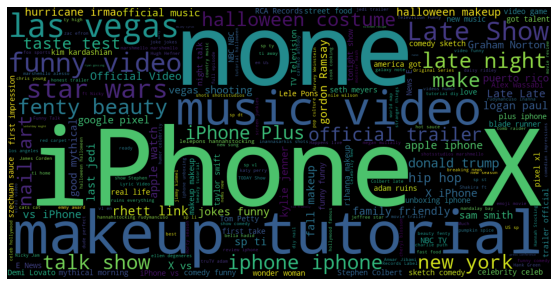

In [55]:
plt.figure(figsize=(15, 5))
plt.imshow(wordCloud)
plt.axis('off')

#### Lets find out the relation among continuous variables
#### As quite obvious the number of likes have very strong relation with views

* Views vs Likes

Text(0.5, 1.0, 'Regression plot for views and likes')

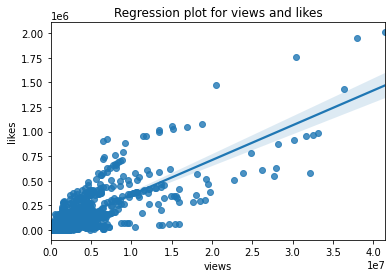

In [56]:
sns.regplot(data=videos, x='views', y='likes')
plt.title('Regression plot for views and likes')

* Views vs Dislikes

Text(0.5, 1.0, 'Regression plot for views and likes')

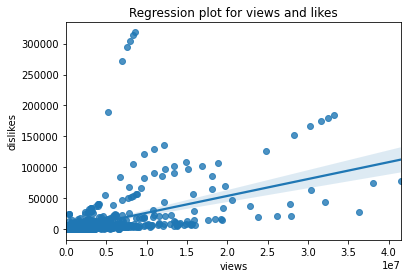

In [57]:
sns.regplot(data=videos, x='views', y='dislikes')
plt.title('Regression plot for views and dislikes')

#### Correlation matrix is the evidence of above analysis!

In [60]:
df_corr = videos[['views', 'likes', 'dislikes']]

In [61]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

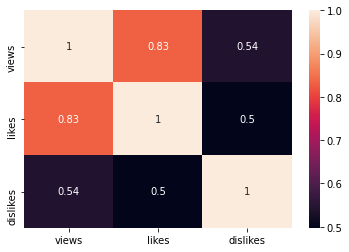

In [63]:
sns.heatmap(df_corr.corr(), annot=True)

## Analysing Emojis in Comments

In [12]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [36]:
comments['comment_text'][2249]

'👸🏿👸🏿👸🏿👸🏿👸🏿'

In [14]:
print('\U0001F600')

😀


In [15]:
import emoji

In [16]:
len(comments)

718424

In [43]:
comment = comments['comment_text'][1]
comment

'To be there with a samsung phone\\n😂😂😂'

In [44]:
[c for c in comment if c in emoji.UNICODE_EMOJI_ENGLISH]

['😂', '😂', '😂']

In [47]:
#storing all the emojis across the comments in one variable
str=''
for i in comments['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI_ENGLISH]
    for ele in list:
        str=str+ele

In [48]:
len(str)

333278

In [49]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊😊😍😊❤❤❤❤😍

In [50]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [51]:
result

{'🦇': 6,
 '✌': 859,
 '🙇': 50,
 '〰': 295,
 '🗞': 5,
 '🍀': 68,
 '🙌': 2734,
 '♍': 11,
 '🐢': 24,
 '✔': 214,
 '😺': 107,
 '🛡': 8,
 '🦏': 1,
 '💲': 137,
 '🔲': 5,
 '😬': 5489,
 '➡': 44,
 '🎿': 10,
 '🛄': 6,
 '📷': 34,
 '💴': 45,
 '®': 53,
 '⛑': 22,
 '⏯': 4,
 '🕷': 99,
 '📝': 16,
 '🍴': 14,
 '🌳': 10,
 '⬜': 141,
 '◻': 5,
 '⏏': 4,
 '❤': 36780,
 '🎭': 29,
 '🦈': 31,
 '👼': 76,
 '🤱': 2,
 '🛩': 11,
 '😦': 109,
 '🌾': 33,
 '✅': 128,
 '🚰': 10,
 '🥅': 2,
 '✳': 33,
 '🥟': 1,
 '⚕': 16,
 '🤝': 32,
 '🍥': 16,
 '😥': 860,
 '💯': 1796,
 '🔯': 10,
 '⛹': 6,
 '🅰': 14,
 '🤵': 4,
 '🌞': 119,
 '🚱': 7,
 '🥐': 10,
 '🤔': 1734,
 '📂': 28,
 '🌷': 97,
 '🚪': 16,
 '♒': 10,
 '🔧': 19,
 '♏': 14,
 '🍐': 12,
 '🎪': 16,
 '🎅': 53,
 '🍏': 20,
 '📍': 8,
 '🗻': 11,
 '📙': 11,
 '🉐': 9,
 '🌌': 46,
 '🛷': 1,
 '🎵': 324,
 '🎾': 14,
 '♿': 12,
 '💽': 19,
 '🏆': 178,
 '❔': 19,
 '🏴': 14,
 '🍻': 46,
 '📤': 8,
 '📌': 11,
 '🔇': 7,
 '📯': 23,
 '🍂': 310,
 '🏔': 11,
 '🎠': 24,
 '↖': 5,
 '🐇': 41,
 '🧞': 6,
 '🙏': 1886,
 '🐌': 15,
 '🎽': 9,
 '🚌': 16,
 '🐿': 15,
 '🕍': 6,
 '🚔': 11,
 '👫': 58,
 '🚛': 5,

* sort the emojis according to its count or frequency

In [52]:
#sorting the dictionary based on values in ascending order
final={}
for key,value in sorted(result.items(),key =lambda item:item[1]):
    final[key]=value

In [53]:
final

{'🦏': 1,
 '🥟': 1,
 '🛷': 1,
 '🧤': 1,
 '🛒': 1,
 '🧣': 1,
 '🤺': 1,
 '🧠': 1,
 '🤟': 1,
 '🥚': 1,
 '🥡': 1,
 '🤹': 1,
 '🥨': 1,
 '🥜': 1,
 '🤽': 1,
 '🦓': 1,
 '🤾': 1,
 '🥌': 1,
 '🤱': 2,
 '🥅': 2,
 '🧡': 2,
 '🦖': 2,
 '🎌': 2,
 '🦕': 2,
 '🧝': 2,
 '🦔': 2,
 '🧢': 2,
 '🧘': 2,
 '🧒': 2,
 '🧛': 2,
 '🤫': 3,
 '🥖': 3,
 '🥄': 3,
 '🤨': 3,
 '🧐': 3,
 '🤯': 3,
 '⏯': 4,
 '⏏': 4,
 '🤵': 4,
 '🥝': 4,
 '♾': 4,
 '🥞': 4,
 '♟': 4,
 '🤬': 4,
 '🧟': 4,
 '⏹': 4,
 '🗄': 4,
 '🗂': 4,
 '💹': 4,
 '⚧': 4,
 '⏲': 4,
 '🦍': 4,
 '🛣': 4,
 '⚗': 4,
 '🥈': 4,
 '🛬': 4,
 '🛢': 4,
 '⚙': 4,
 '☸': 4,
 '🗓': 4,
 '🦆': 4,
 '🖍': 4,
 '🖇': 4,
 '🦐': 4,
 '🏷': 4,
 '⏸': 4,
 '🏌': 4,
 '☦': 4,
 '🗞': 5,
 '🔲': 5,
 '◻': 5,
 '↖': 5,
 '🚛': 5,
 '🚻': 5,
 '🔼': 5,
 '🈴': 5,
 '🎐': 5,
 '🤮': 5,
 '🧜': 5,
 '🛋': 5,
 '🌫': 5,
 '🕹': 5,
 '🔡': 5,
 '🈲': 5,
 '🖊': 5,
 '🦒': 5,
 '🗃': 5,
 '🚉': 5,
 '🥛': 5,
 '🆔': 5,
 '🚎': 5,
 '🏮': 5,
 '🈳': 5,
 '🛥': 5,
 '🆖': 5,
 '🔚': 5,
 '☂': 5,
 'Ⓜ': 5,
 'ℹ': 5,
 '🖼': 5,
 '➿': 5,
 '⛱': 5,
 '⚾': 5,
 '🔤': 5,
 '⛸': 5,
 '◽': 5,
 '🔁': 5,
 '🗜': 5,
 '🈂': 5,
 '↔': 5,
 '🈵': 5,
 

In [54]:
#convert dictionary into list for this we have to unzip this dictionary
keys=[*final.keys()]

In [55]:
keys

['🦏',
 '🥟',
 '🛷',
 '🧤',
 '🛒',
 '🧣',
 '🤺',
 '🧠',
 '🤟',
 '🥚',
 '🥡',
 '🤹',
 '🥨',
 '🥜',
 '🤽',
 '🦓',
 '🤾',
 '🥌',
 '🤱',
 '🥅',
 '🧡',
 '🦖',
 '🎌',
 '🦕',
 '🧝',
 '🦔',
 '🧢',
 '🧘',
 '🧒',
 '🧛',
 '🤫',
 '🥖',
 '🥄',
 '🤨',
 '🧐',
 '🤯',
 '⏯',
 '⏏',
 '🤵',
 '🥝',
 '♾',
 '🥞',
 '♟',
 '🤬',
 '🧟',
 '⏹',
 '🗄',
 '🗂',
 '💹',
 '⚧',
 '⏲',
 '🦍',
 '🛣',
 '⚗',
 '🥈',
 '🛬',
 '🛢',
 '⚙',
 '☸',
 '🗓',
 '🦆',
 '🖍',
 '🖇',
 '🦐',
 '🏷',
 '⏸',
 '🏌',
 '☦',
 '🗞',
 '🔲',
 '◻',
 '↖',
 '🚛',
 '🚻',
 '🔼',
 '🈴',
 '🎐',
 '🤮',
 '🧜',
 '🛋',
 '🌫',
 '🕹',
 '🔡',
 '🈲',
 '🖊',
 '🦒',
 '🗃',
 '🚉',
 '🥛',
 '🆔',
 '🚎',
 '🏮',
 '🈳',
 '🛥',
 '🆖',
 '🔚',
 '☂',
 'Ⓜ',
 'ℹ',
 '🖼',
 '➿',
 '⛱',
 '⚾',
 '🔤',
 '⛸',
 '◽',
 '🔁',
 '🗜',
 '🈂',
 '↔',
 '🈵',
 '🔢',
 '✡',
 '🈹',
 '🗒',
 '🔳',
 '🆎',
 '🚁',
 '🚟',
 '❎',
 '⌨',
 '🔂',
 '⛴',
 '🔃',
 '♦',
 '🔠',
 '↕',
 '🔖',
 '⛩',
 '♠',
 '↩',
 '🥉',
 '🈁',
 '🛂',
 '🈯',
 '⛏',
 '🛤',
 '🖨',
 '↪',
 '🔣',
 '🗳',
 '🕎',
 '🖲',
 '⚒',
 '🚠',
 '⏺',
 '🔄',
 '🧖',
 '㊙',
 '🦇',
 '🛄',
 '⛹',
 '🧞',
 '🕍',
 '⏮',
 '🏚',
 '🛠',
 '㊗',
 '🚄',
 '⏫',
 '⤵',
 '🛅',
 '🖌',
 '🕰',
 '🚦',
 '🏧',
 '🏐'

In [56]:
values=[*final.values()]

In [57]:
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [58]:
#creating dataframe from the dictionary
#taking highest 20 values
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20:]})

In [59]:
df

chars    num
0      🙌   2734
1      🏼   2961
2      💙   2968
3      💗   3071
4      👌   3534
5      💜   3616
6      🏻   4412
7      💖   4809
8      😊   4946
9      👏   5357
10     😬   5489
11     👍   5817
12     😘   6334
13     💕   6531
14     ♥   7173
15     😭   9098
16     🔥  10249
17     😍  34856
18     ❤  36780
19     😂  43947

In [64]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [65]:
#ploting bar graph to see which emoji is highest used emoji
trace=go.Bar(
x=df['chars'],
y=df['num']
)

iplot([trace])